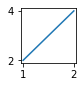

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(1,1))
plt.plot([1,2],[2,4])
plt.show()

In [12]:
# Now import everything else
import numpy as np
import pylab
import time
import MicroscopeClasses

# Camera Object

In [3]:
# Make a camera object
Camera=MicroscopeClasses.CamFLIR()

In [4]:
#This is how you take a photo
img=Camera.Snap(1)

Grabbed Image 0, width = 1440, height = 1080


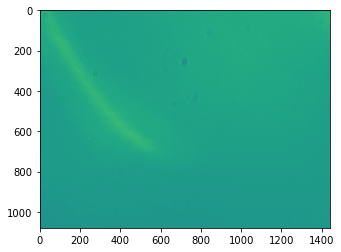

In [5]:
#and plot it
pylab.imshow(img[0],clim=(0,30))

# Stage Object

In [6]:
#Initiate a stage object
Stage=MicroscopeClasses.Stage()

In [7]:
#Move in X
Stage.MoveToX(0.1)
#Query position
print("Stage at ",Stage.X,Stage.Y,Stage.Z)

time.sleep(0.1)

#Move Back
Stage.MoveToX(0.0)
#Query position
print("Stage at ", Stage.X,Stage.Y,Stage.Z)

Stage at  0.1 0 3.35
Stage at  0.0 0 3.35


# Scan Example

In [14]:
def MakeImageSweep(Zs,showthem=True):
    # Step through these Z values

    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        Stage.MoveToZ(Zs[i])
        
        #Snap a pic
        pics.append(Camera.Snap(1)[0])
        
        #Optionally display them
        if(showthem):
            plt.figure(figsize=(5,5))
            plt.imshow(pics[i])
            plt.title(Zs[i])
            
    return pics

Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080


<ipython-input-14-78d5130a17db>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080
Grabbed Image 0, width = 1440, height = 1080


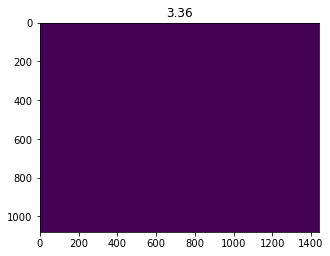

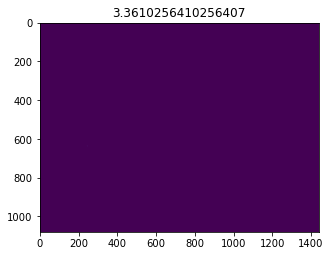

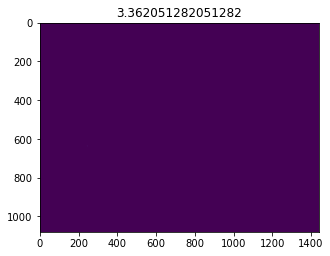

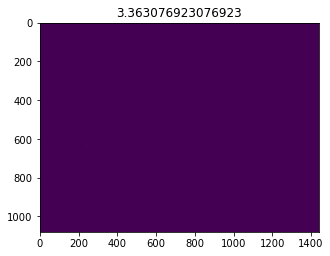

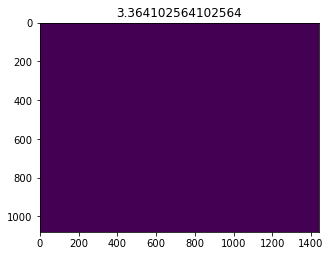

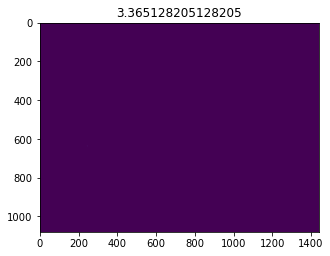

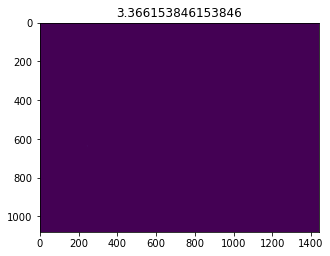

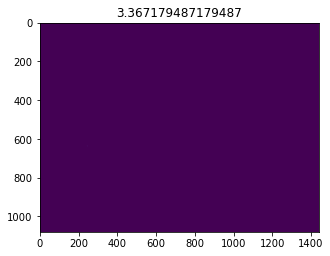

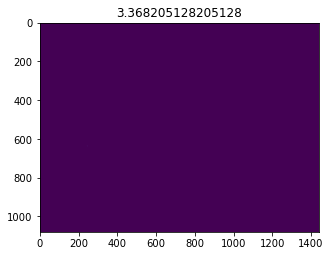

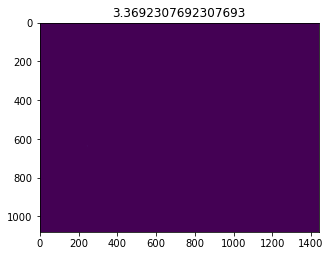

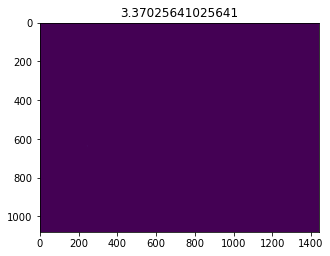

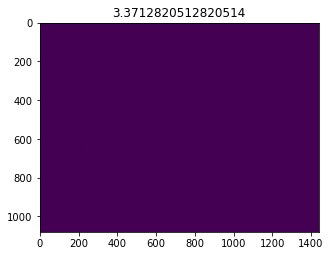

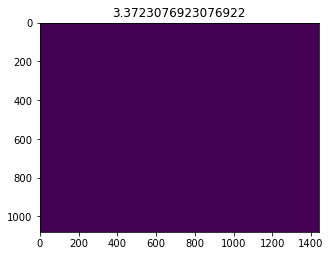

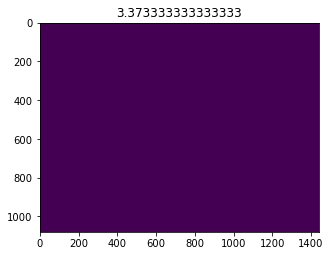

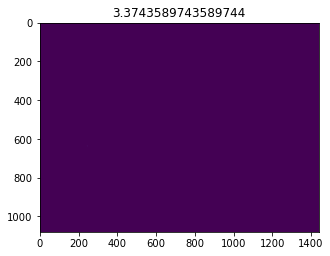

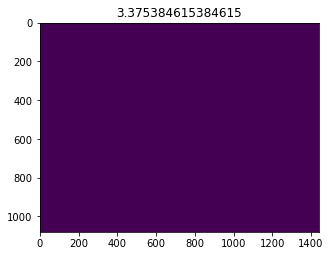

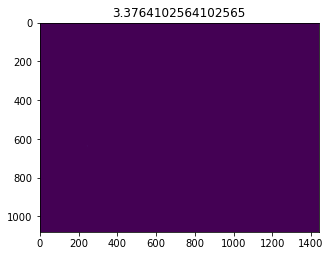

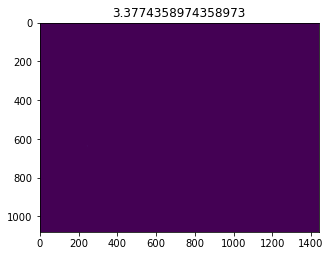

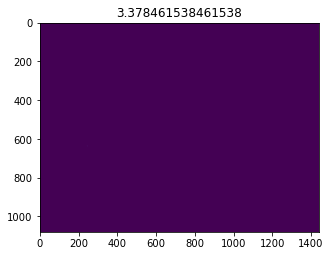

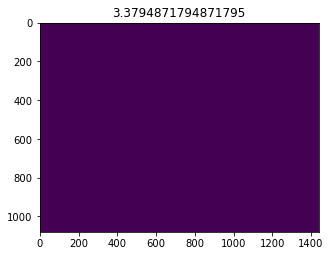

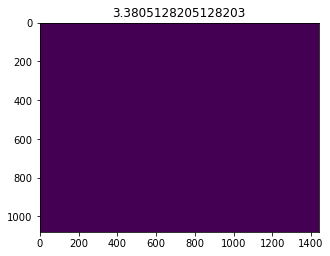

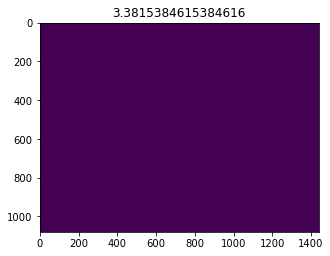

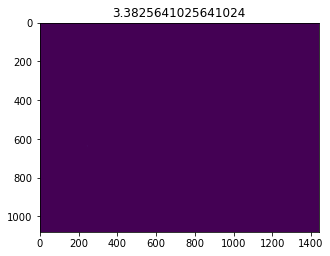

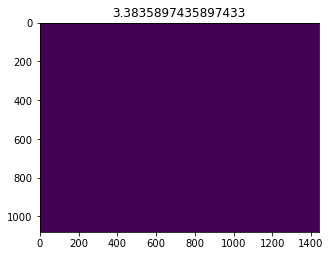

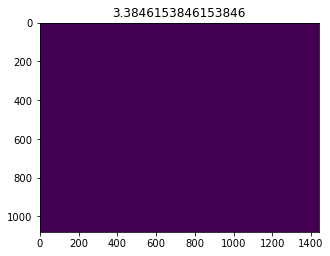

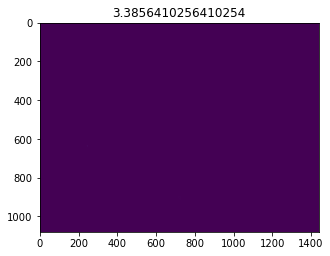

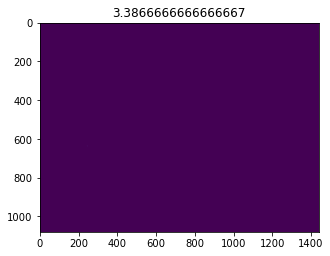

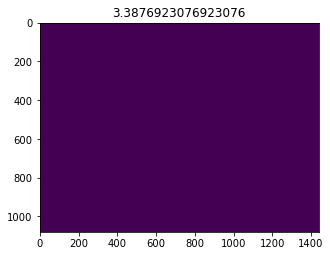

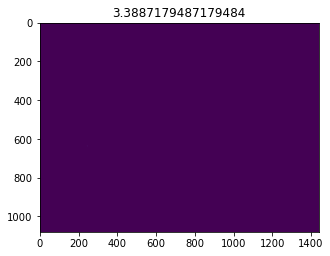

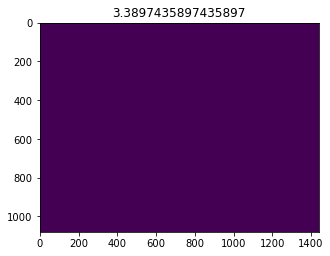

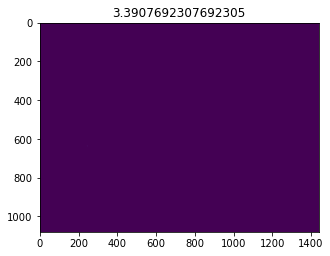

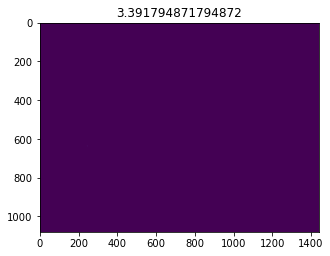

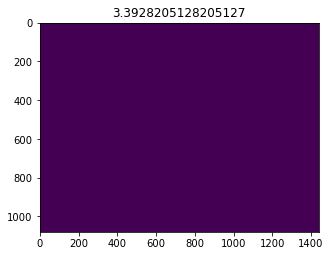

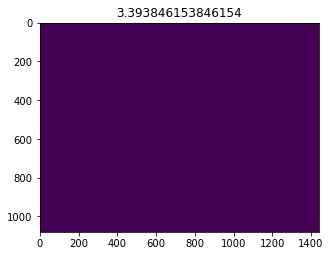

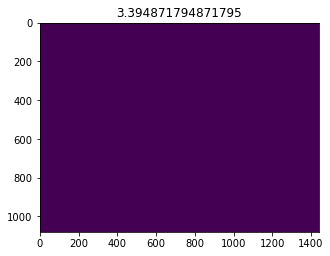

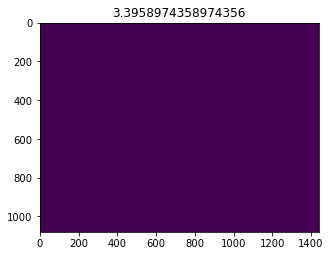

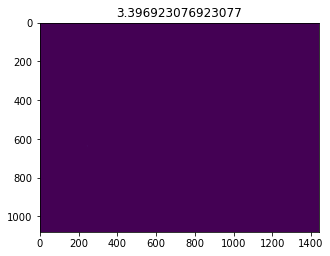

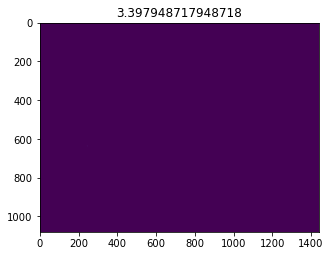

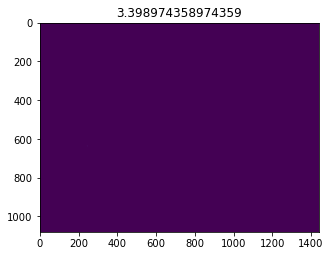

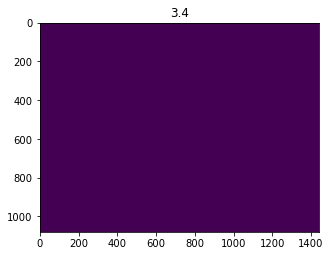

In [22]:
Zs=np.linspace(3.36,3.4,40)
pics=MakeImageSweep(Zs,showthem=True)

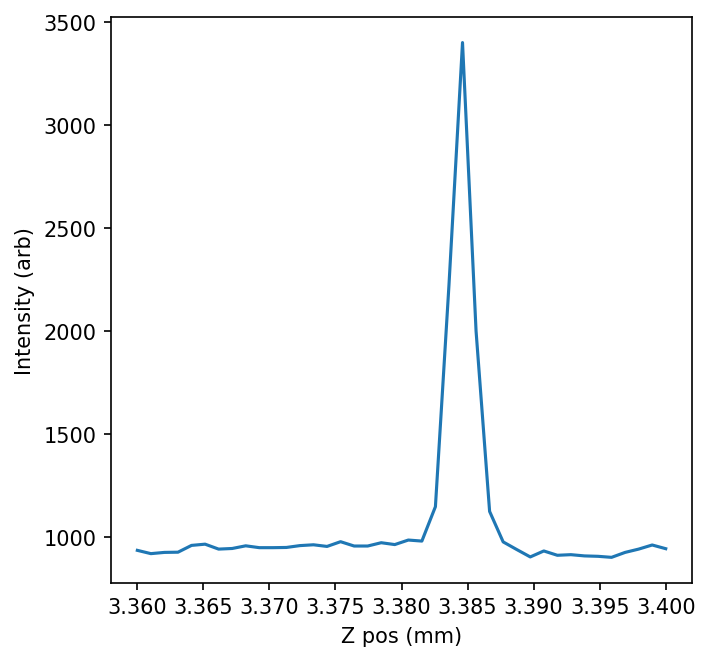

In [23]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)